<a href="https://colab.research.google.com/github/Div25singh/Bestseller/blob/master/loanMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  


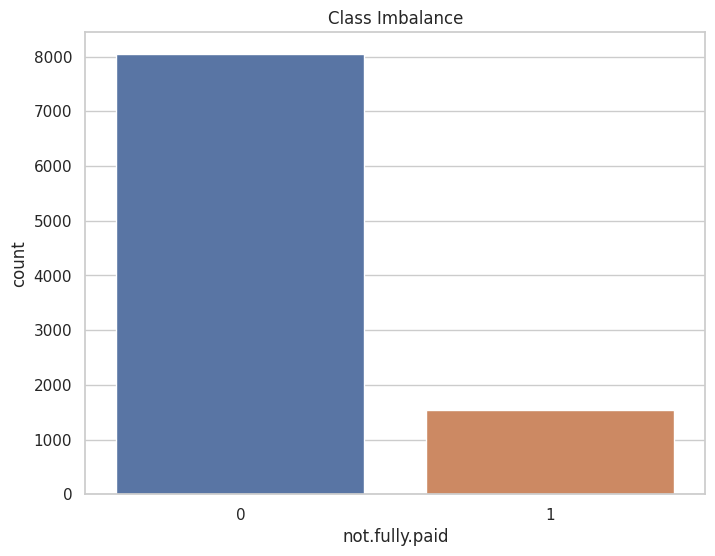

<ipython-input-1-cf40f3273f1f>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


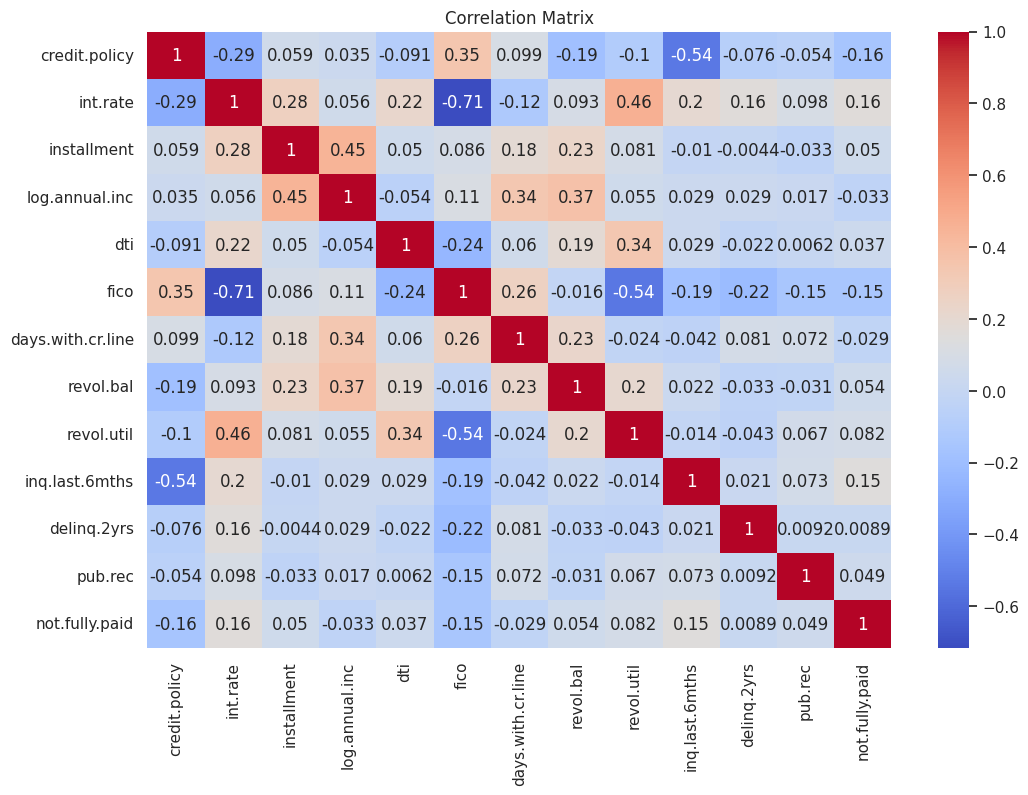

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


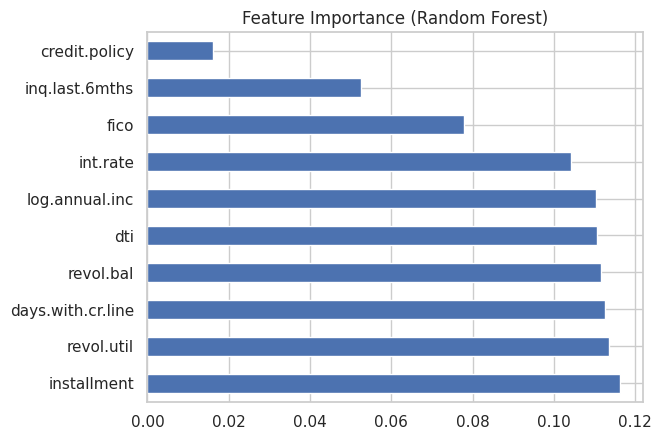

Random Forest Performance:
Accuracy: 0.8408141962421712
Confusion Matrix:
 [[1609    2]
 [ 303    2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.50      0.01      0.01       305

    accuracy                           0.84      1916
   macro avg       0.67      0.50      0.46      1916
weighted avg       0.79      0.84      0.77      1916

KNN Performance:
Accuracy: 0.8230688935281837
Confusion Matrix:
 [[1561   50]
 [ 289   16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1611
           1       0.24      0.05      0.09       305

    accuracy                           0.82      1916
   macro avg       0.54      0.51      0.49      1916
weighted avg       0.75      0.82      0.77      1916



In [1]:
# Import Libraries/Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("loan_data.csv")

# Import required libraries for data analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for seaborn
sns.set(style="whitegrid")

# Data Visualization and Exploration

# Display the first few rows of the dataset
print(df.head(2))

# Check for class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='not.fully.paid', data=df)
plt.title("Class Imbalance")
plt.show()

# Explore dataset with visualizations
# You can create various visualizations like histograms, pairplots, etc., to gain insights into the data.

# Correlational Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Correlational analysis can help identify highly correlated features. High correlations can indicate redundancy in the features, which might affect feature selection. It's essential to keep this in mind when selecting features for your models.

# Data Pre-processing and Cleaning

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle outliers if present
# You can use techniques like z-score, IQR, or domain knowledge to handle outliers.

# Handle skewed data
# Apply transformations like log transformation or box-cox to handle skewed data.

# Explore data balancing tasks
# Investigate techniques like oversampling, undersampling, or Synthetic Minority Over-sampling Technique (SMOTE) for handling class imbalance.

# Feature Engineering

# Create dummy variables for categorical features (e.g., 'purpose') using one-hot encoding.
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Apply feature scaling/standardization or normalization if necessary.
# Standardization (z-score scaling) can be applied to continuous numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
    'inq.last.6mths', 'delinq.2yrs', 'pub.rec']] = scaler.fit_transform(
    df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
        'inq.last.6mths', 'delinq.2yrs', 'pub.rec']])

# Explore feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()

# Model Building

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classification model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Tune hyperparameters using cross-validation
# You can use techniques like GridSearchCV or RandomizedSearchCV for hyperparameter tuning.

# Evaluate the Random Forest model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Build a KNN classification model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Determine the optimal value of k through hyperparameter tuning and cross-validation
# Use techniques like GridSearchCV to find the optimal k value.

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Performance Evaluation

# Compare the performance of Random Forest and KNN models using appropriate evaluation metrics.
# Provide insights into which model performs better and why.

# You can compare accuracy, precision, recall, F1-score, and ROC AUC to determine which model performs better. Additionally, consider the business context and the importance of false positives and false negatives when choosing the best model.

# Depending on the results, you can further fine-tune the models or explore other algorithms to improve performance.

